In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,ElasticNet,Lasso
from sklearn.model_selection import train_test_split
import scipy.stats as stat
import pylab
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [82]:
df1=pd.read_csv(r'C:\Users\my computer\Documents\Data Science\Assignments\Multi Linear Regression\ToyotaCorolla.csv',encoding='latin1')

In [83]:
df1.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [85]:
df1=df1[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [86]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [87]:
scaler=StandardScaler()

In [90]:
scaled_df=scaler.fit_transform(df1)
df=pd.DataFrame(scaled_df,columns=['Price','Age_08_04','KM','HP','CC','Doors','Gears','Quarterly_Tax','Weight'])
df

,Price,Age_08_04,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,0.763763,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.853577
...,...,...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-0.901883
1432,0.031491,0.863362,-1.321120,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915


In [91]:
df.loc[df.duplicated()]

,Price,Age_08_04,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
113,3.921772,-2.578699,-1.4744,0.968085,0.997419,1.014941,-0.140425,3.572418,4.704053


In [92]:
df=df.drop_duplicates()
df

,Price,Age_08_04,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,0.763763,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.853577
...,...,...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-0.901883
1432,0.031491,0.863362,-1.321120,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915


In [93]:
df.duplicated().sum()

0

In [94]:
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
CC               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [95]:
df.describe()

,Price,Age_08_04,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,-0.002733,0.001797,0.001027,-0.000675,-0.000695,-0.000707,0.000098,-0.002489,-0.003278
std,0.995320,0.998376,0.999939,1.000370,1.000350,1.000338,1.000690,0.996237,0.992952
min,-1.759887,-2.955175,-1.827849,-2.170298,-0.652594,-2.135178,-10.753613,-1.656907,-1.376963
25%,-0.629071,-0.642540,-0.681007,-0.768042,-0.416878,-1.085139,-0.140425,-0.440785,-0.616836
50%,-0.229149,0.271757,-0.135551,0.567440,0.054555,-0.035099,-0.140425,-0.051626,-0.046740
75%,0.336259,0.755797,0.493640,0.567440,0.054555,1.014941,-0.140425,-0.051626,0.238307
max,6.004128,1.293619,4.653267,6.042918,33.997687,1.014941,5.166169,4.764218,10.309989


In [96]:
df.corr()

,Price,Age_08_04,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<Axes: >

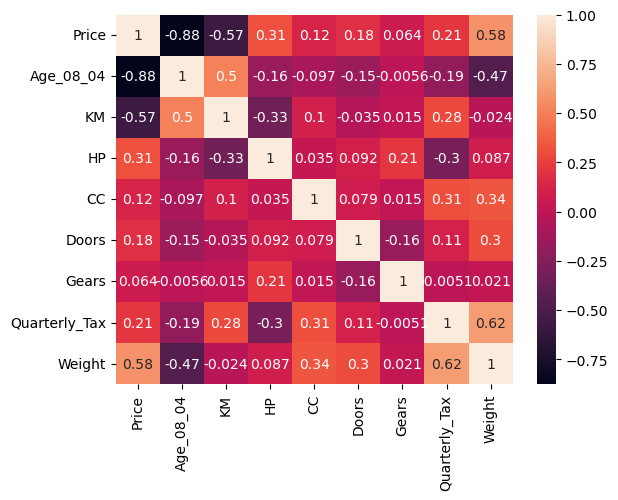

In [97]:
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Weight')

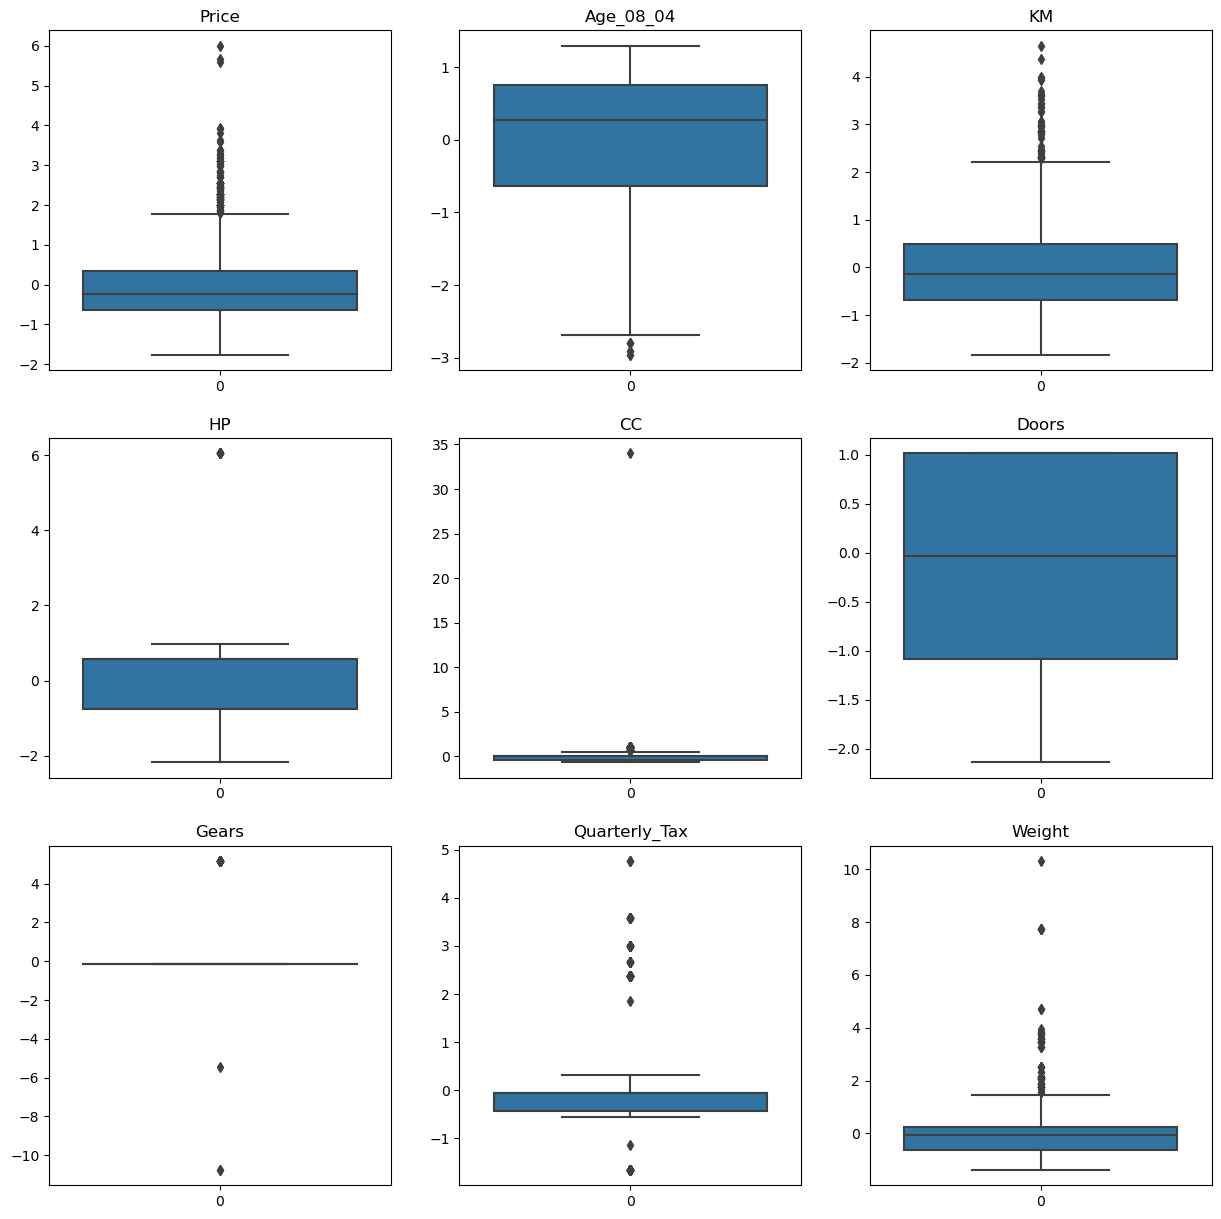

In [98]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(df['Price'])
plt.title('Price')
plt.subplot(3,3,2)
sns.boxplot(df['Age_08_04'])
plt.title('Age_08_04')
plt.subplot(3,3,3)
sns.boxplot(df['KM'])
plt.title('KM')
plt.subplot(3,3,4)
sns.boxplot(df['HP'])
plt.title('HP')
plt.subplot(3,3,5)
sns.boxplot(df['CC'])
plt.title('CC')
plt.subplot(3,3,6)
sns.boxplot(df['Doors'])
plt.title('Doors')
plt.subplot(3,3,7)
sns.boxplot(df['Gears'])
plt.title('Gears')
plt.subplot(3,3,8)
sns.boxplot(df['Quarterly_Tax'])
plt.title('Quarterly_Tax')
plt.subplot(3,3,9)
sns.boxplot(df['Weight'])
plt.title('Weight')

Text(0.5, 1.0, 'Weight')

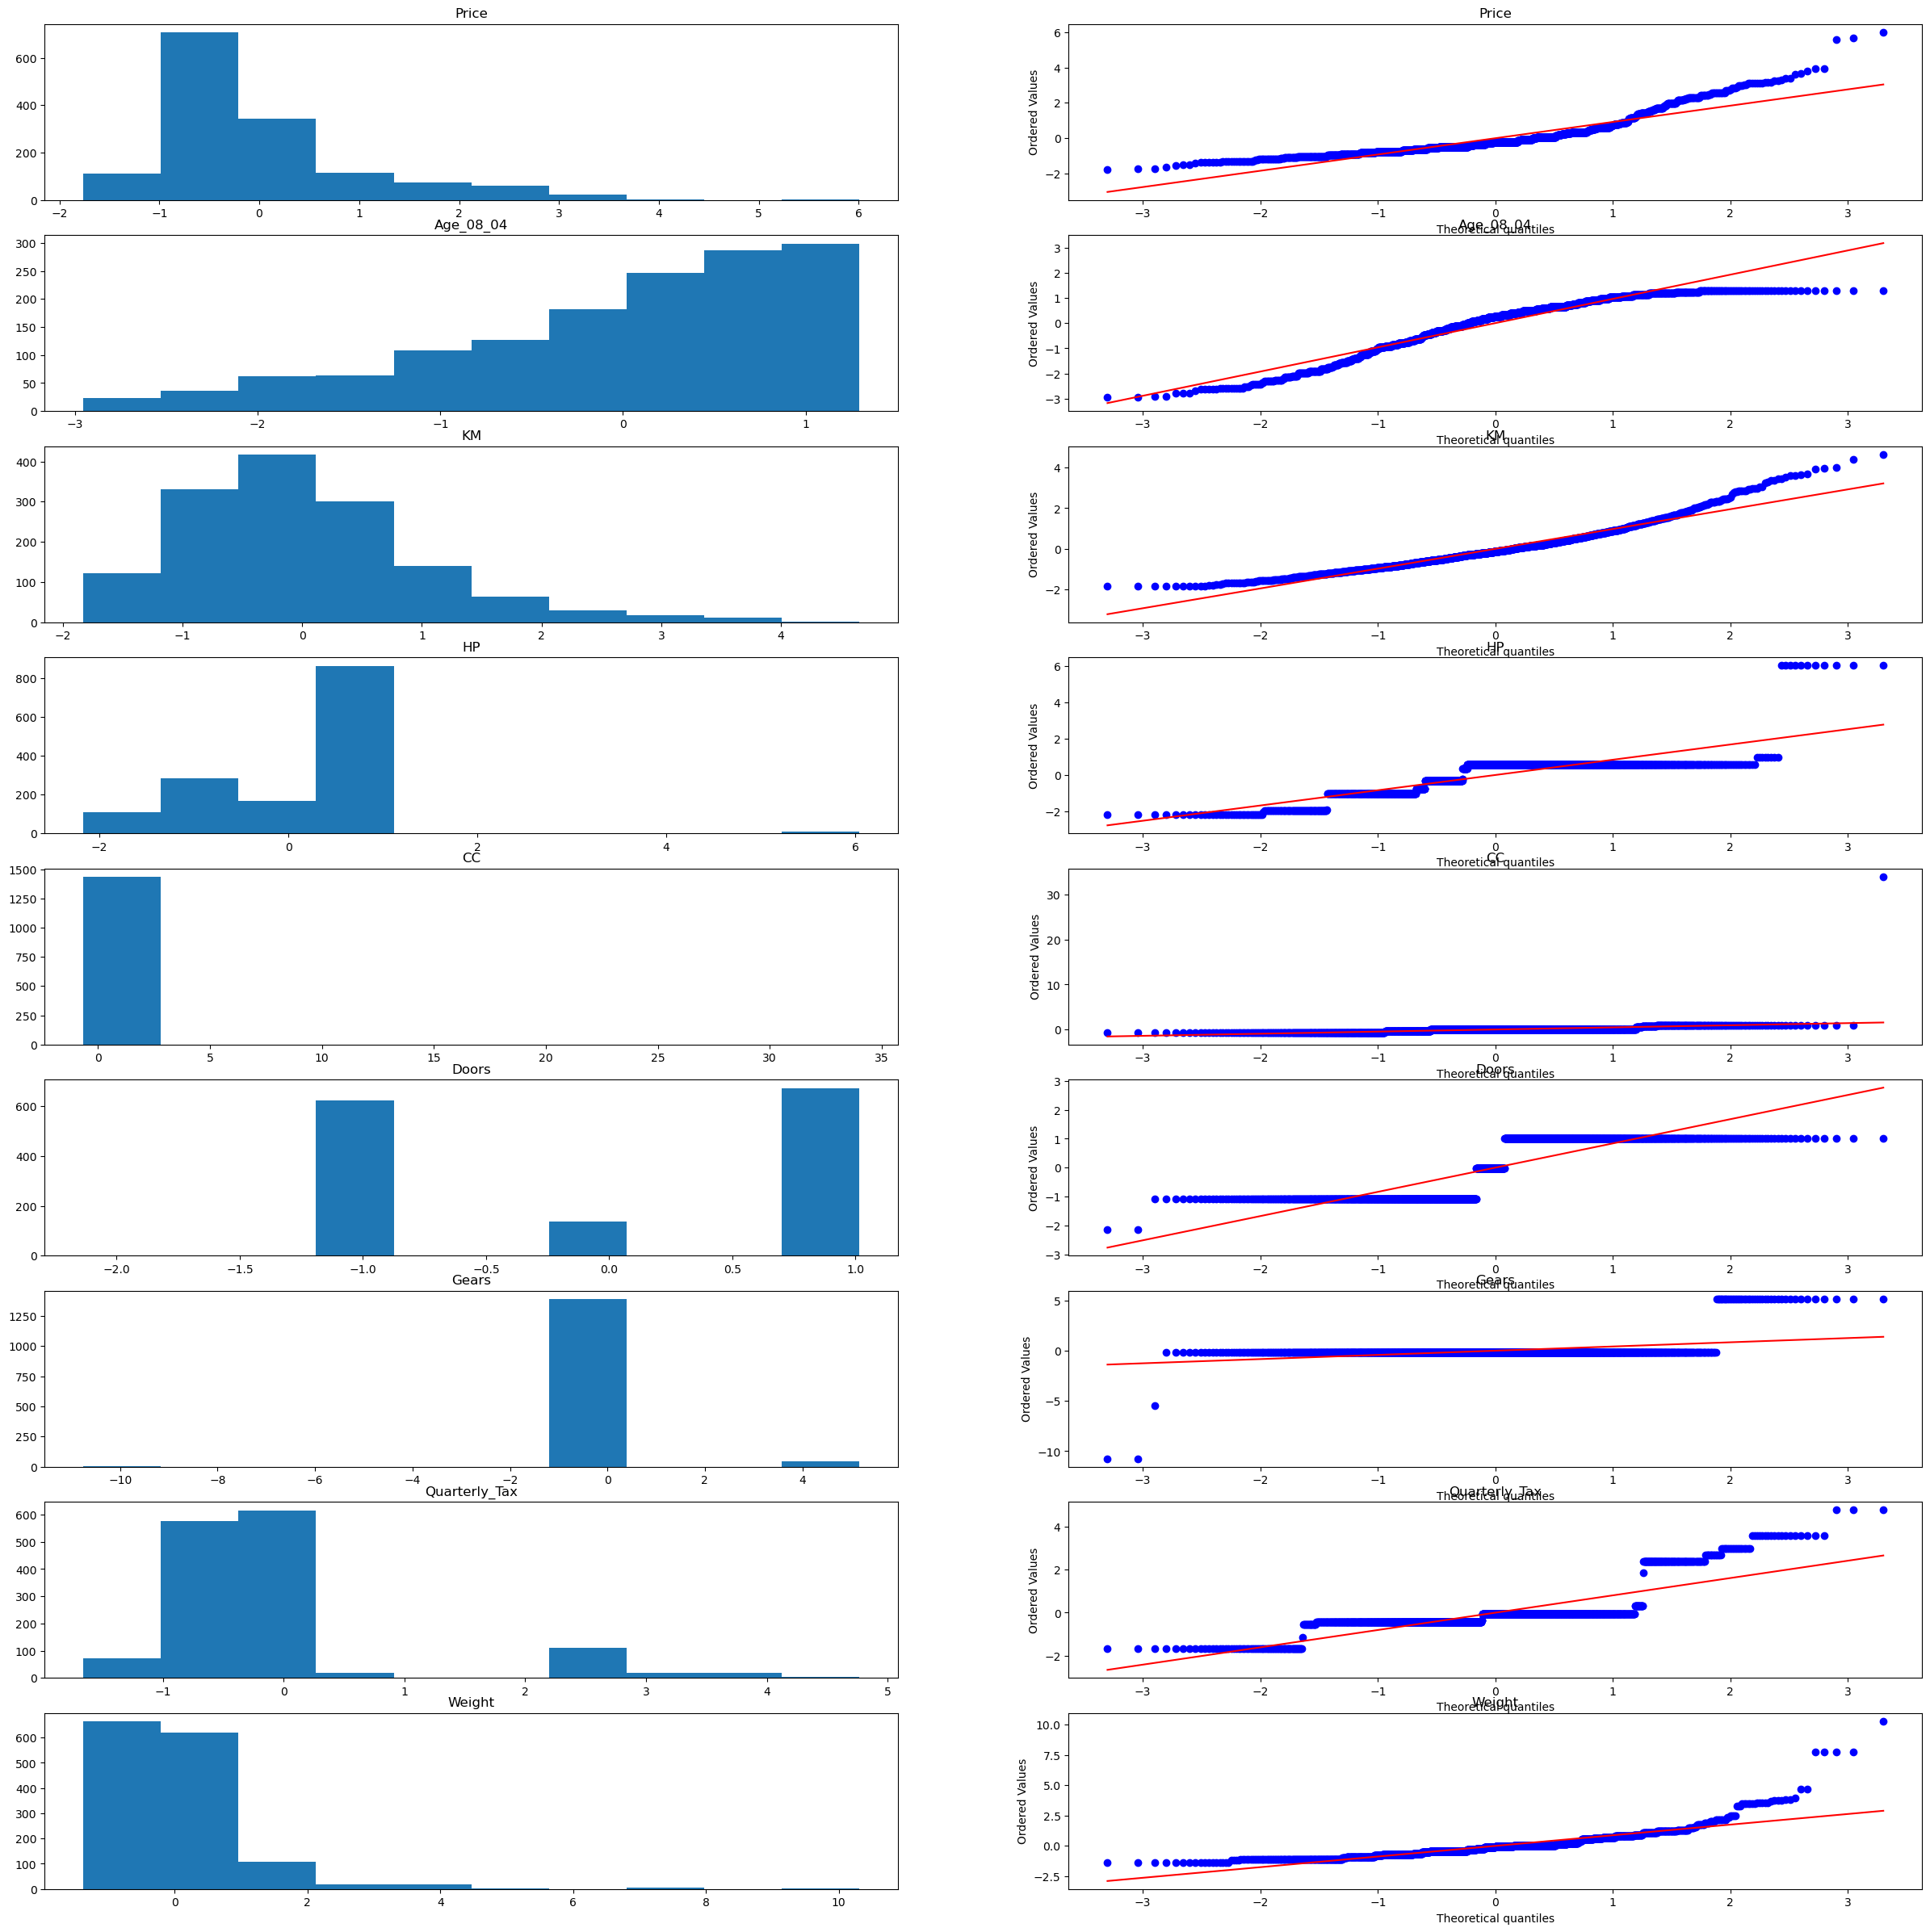

In [99]:
plt.figure(figsize=(30,30))
plt.subplot(9,2,1)
plt.hist(df['Price'])
plt.title('Price')
plt.subplot(9,2,2)
stat.probplot(df['Price'],dist='norm',plot=pylab)
plt.title('Price')
plt.subplot(9,2,3)
plt.hist(df['Age_08_04'])
plt.title('Age_08_04')
plt.subplot(9,2,4)
stat.probplot(df['Age_08_04'],dist='norm',plot=pylab)
plt.title('Age_08_04')
plt.subplot(9,2,5)
plt.hist(df['KM'])
plt.title('KM')
plt.subplot(9,2,6)
stat.probplot(df['KM'],dist='norm',plot=pylab)
plt.title('KM')
plt.subplot(9,2,7)
plt.hist(df['HP'])
plt.title('HP')
plt.subplot(9,2,8)
stat.probplot(df['HP'],dist='norm',plot=pylab)
plt.title('HP')
plt.subplot(9,2,9)
plt.hist(df['CC'])
plt.title('CC')
plt.subplot(9,2,10)
stat.probplot(df['CC'],dist='norm',plot=pylab)
plt.title('CC')
plt.subplot(9,2,11)
plt.hist(df['Doors'])
plt.title('Doors')
plt.subplot(9,2,12)
stat.probplot(df['Doors'],dist='norm',plot=pylab)
plt.title('Doors')
plt.subplot(9,2,13)
plt.hist(df['Gears'])
plt.title('Gears')
plt.subplot(9,2,14)
stat.probplot(df['Gears'],dist='norm',plot=pylab)
plt.title('Gears')
plt.subplot(9,2,15)
plt.hist(df['Quarterly_Tax'])
plt.title('Quarterly_Tax')
plt.subplot(9,2,16)
stat.probplot(df['Quarterly_Tax'],dist='norm',plot=pylab)
plt.title('Quarterly_Tax')
plt.subplot(9,2,17)
plt.hist(df['Weight'])
plt.title('Weight')
plt.subplot(9,2,18)
stat.probplot(df['Weight'],dist='norm',plot=pylab)
plt.title('Weight')

<Axes: xlabel='Doors', ylabel='Price'>

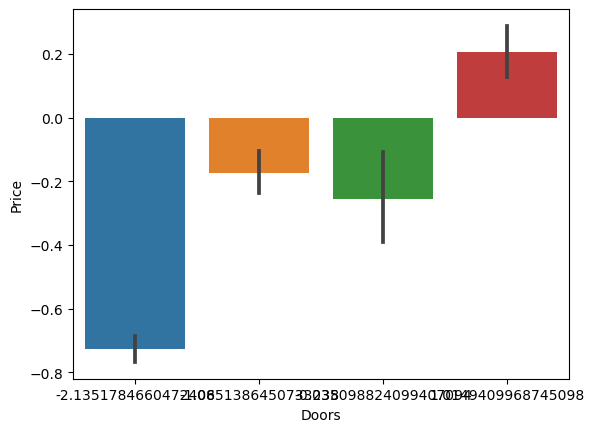

In [100]:
sns.barplot(x='Doors',y='Price',data=df)

<Axes: xlabel='Gears', ylabel='Price'>

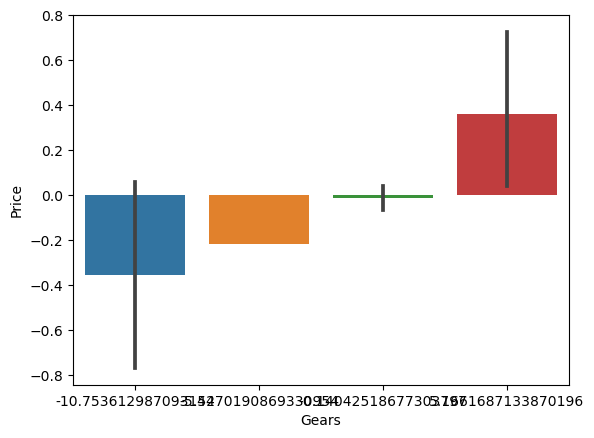

In [101]:
sns.barplot(x='Gears',y='Price',data=df)

In [102]:
df4=df.drop(['Gears','Doors'],axis=1)
df4

,Price,Age_08_04,KM,HP,CC,Quarterly_Tax,Weight
0,0.763763,-1.771966,-0.574695,-0.768042,0.997419,2.988680,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,0.997419,2.988680,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,0.997419,2.988680,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,0.997419,2.988680,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,0.997419,2.988680,1.853577
...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.652594,-0.440785,-0.901883
1432,0.031491,0.863362,-1.321120,-1.035138,-0.652594,-0.440785,-1.091915
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.652594,-0.440785,-1.091915
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.652594,-0.440785,-1.091915


### Median Imputation Model

In [103]:
df2=df4.copy()
df2

,Price,Age_08_04,KM,HP,CC,Quarterly_Tax,Weight
0,0.763763,-1.771966,-0.574695,-0.768042,0.997419,2.988680,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,0.997419,2.988680,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,0.997419,2.988680,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,0.997419,2.988680,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,0.997419,2.988680,1.853577
...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.652594,-0.440785,-0.901883
1432,0.031491,0.863362,-1.321120,-1.035138,-0.652594,-0.440785,-1.091915
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.652594,-0.440785,-1.091915
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.652594,-0.440785,-1.091915


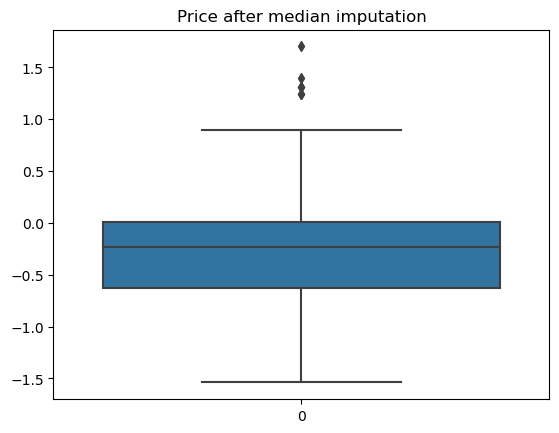

In [104]:
for i in df2['Price']:
    Q1 = np.quantile(df2.Price,0.25)
    Q3 = np.quantile(df2.Price,0.75)
    Med = np.median(df2.Price)
    IQR = Q3 - Q1
    UB = Q3+(1.5*IQR)
    LB = Q1-(1.5*IQR)
    if i > UB or i < LB:
        df2['Price'] = df2['Price'].replace(i, np.median(df2['Price']))
sns.boxplot(df2['Price'])
plt.title('Price after median imputation')
plt.show()

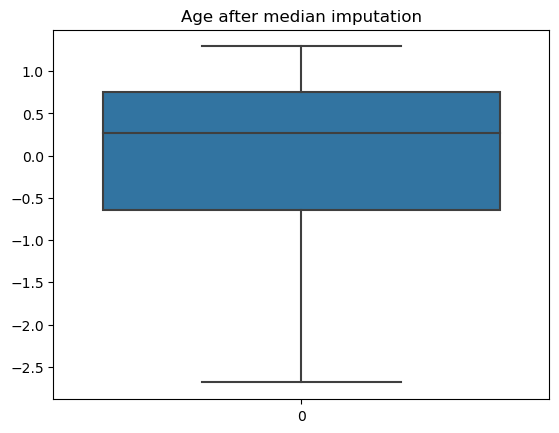

In [105]:
for i in df2['Age_08_04']:
    Q1 = np.quantile(df2.Age_08_04,0.25)
    Q3 = np.quantile(df2.Age_08_04,0.75)
    Med = np.median(df2.Age_08_04)
    IQR = Q3 - Q1
    UB = Q3+(1.5*IQR)
    LB = Q1-(1.5*IQR)
    if i > UB or i < LB:
        df2['Age_08_04'] = df2['Age_08_04'].replace(i, np.median(df2['Age_08_04']))
sns.boxplot(df2['Age_08_04'])
plt.title('Age after median imputation')
plt.show()

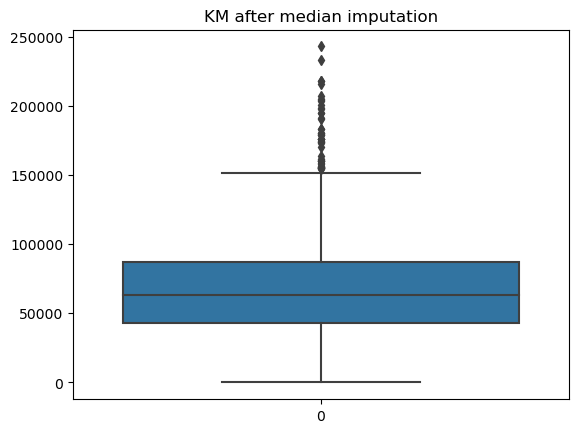

In [106]:
for i in df2['KM']:
    Q1 = np.quantile(df2.KM,0.25)
    Q3 = np.quantile(df2.KM,0.75)
    Med = np.median(df2.KM)
    IQR = Q3 - Q1
    UB = Q3+(1.5*IQR)
    LB = Q1-(1.5*IQR)
    if i > UB or i < LB:
        df2['KM'] = df1['KM'].replace(i, np.median(df2['KM']))
sns.boxplot(df2['KM'])
plt.title('KM after median imputation')
plt.show()

Text(0.5, 1.0, 'HP after median imputation')

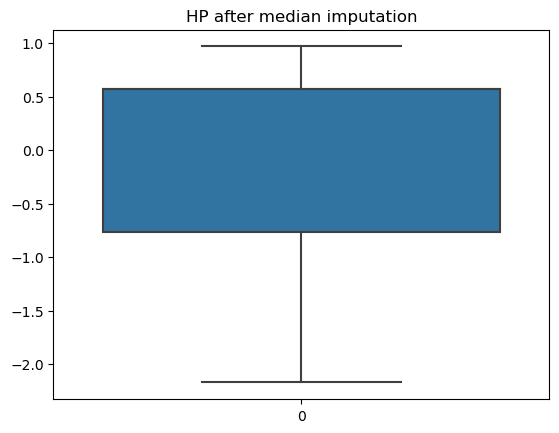

In [107]:
for i in df2['HP']:
    Q1 = np.quantile(df2.HP,0.25)
    Q3 = np.quantile(df2.HP,0.75)
    Med = np.median(df2.HP)
    IQR = Q3 - Q1
    UB = Q3+(1.5*IQR)
    LB = Q1-(1.5*IQR)
    if i > UB or i < LB:
        df2['HP'] = df2['HP'].replace(i, np.median(df2['HP']))
sns.boxplot(df2['HP'])
plt.title('HP after median imputation')

Text(0.5, 1.0, 'CC after median imputation')

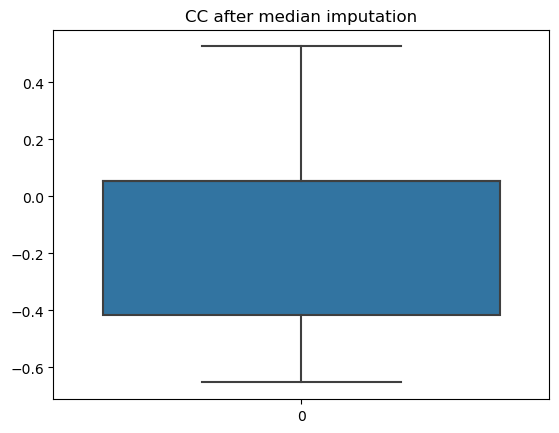

In [108]:
for i in df2['CC']:
    Q1 = np.quantile(df2.CC,0.25)
    Q3 = np.quantile(df2.CC,0.75)
    Med = np.median(df2.CC)
    IQR = Q3 - Q1
    UB = Q3+(1.5*IQR)
    LB = Q1-(1.5*IQR)
    if i > UB or i < LB:
        df2['CC'] = df2['CC'].replace(i, np.median(df2['CC']))
sns.boxplot(df2['CC'])
plt.title('CC after median imputation')

Text(0.5, 1.0, 'Quarterly_Tax after median imputation')

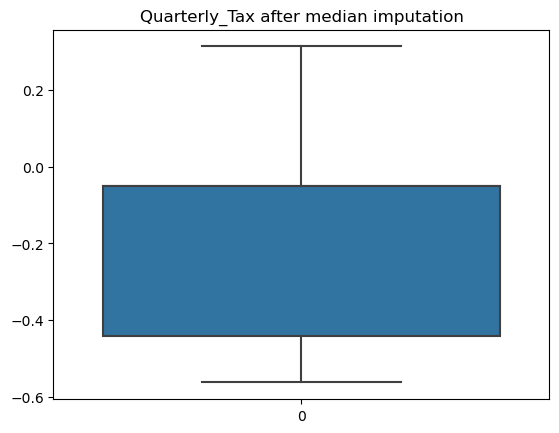

In [109]:
for i in df2['Quarterly_Tax']:
    Q1 = np.quantile(df2.Quarterly_Tax,0.25)
    Q3 = np.quantile(df2.Quarterly_Tax,0.75)
    Med = np.median(df1.Quarterly_Tax)
    IQR = Q3 - Q1
    UB = Q3+(1.5*IQR)
    LB = Q1-(1.5*IQR)
    if i > UB or i < LB:
        df2['Quarterly_Tax'] = df2['Quarterly_Tax'].replace(i, np.median(df2['Quarterly_Tax']))
sns.boxplot(df2['Quarterly_Tax'])
plt.title('Quarterly_Tax after median imputation')

Text(0.5, 1.0, 'Weight after median imputation')

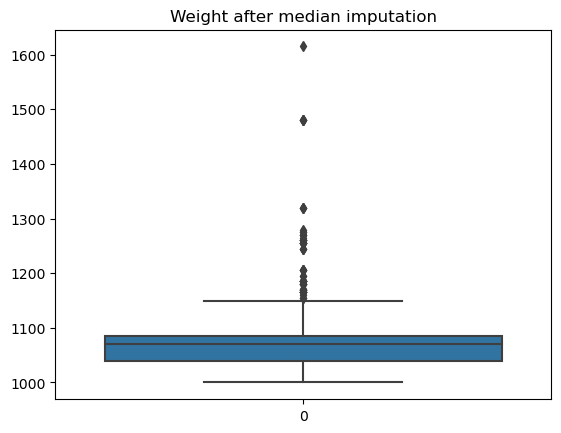

In [110]:
for i in df2['Weight']:
    Q1 = np.quantile(df2.Weight,0.25)
    Q3 = np.quantile(df2.Weight,0.75)
    Med = np.median(df2.Weight)
    IQR = Q3 - Q1
    UB = Q3+(1.5*IQR)
    LB = Q1-(1.5*IQR)
    if i > UB or i < LB:
        df2['Weight'] = df2['Weight'].replace(i, np.median(df2['Weight']))
sns.boxplot(df1['Weight'])
plt.title('Weight after median imputation')

In [111]:
df2

,Price,Age_08_04,KM,HP,CC,Quarterly_Tax,Weight
0,0.763763,-1.771966,46986,-0.768042,0.054555,-0.051626,-0.046740
1,0.832715,-1.771966,72937,-0.768042,0.054555,-0.051626,-0.046740
2,0.887877,-1.718184,41711,-0.768042,0.054555,-0.051626,-0.046740
3,-0.229149,-1.610620,48000,-0.768042,0.054555,-0.051626,-0.046740
4,0.832715,-1.395491,38500,-0.768042,0.054555,-0.051626,-0.046740
...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,20544,-1.035138,-0.652594,-0.440785,-0.901883
1432,0.031491,0.863362,19000,-1.035138,-0.652594,-0.440785,-1.091915
1433,-0.615281,0.809579,17016,-1.035138,-0.652594,-0.440785,-1.091915
1434,-0.960042,0.755797,16916,-1.035138,-0.652594,-0.440785,-1.091915


In [112]:
X= df2[['Age_08_04','KM','HP','CC','Quarterly_Tax','Weight']]
X

,Age_08_04,KM,HP,CC,Quarterly_Tax,Weight
0,-1.771966,46986,-0.768042,0.054555,-0.051626,-0.046740
1,-1.771966,72937,-0.768042,0.054555,-0.051626,-0.046740
2,-1.718184,41711,-0.768042,0.054555,-0.051626,-0.046740
3,-1.610620,48000,-0.768042,0.054555,-0.051626,-0.046740
4,-1.395491,38500,-0.768042,0.054555,-0.051626,-0.046740
...,...,...,...,...,...,...
1431,0.702015,20544,-1.035138,-0.652594,-0.440785,-0.901883
1432,0.863362,19000,-1.035138,-0.652594,-0.440785,-1.091915
1433,0.809579,17016,-1.035138,-0.652594,-0.440785,-1.091915
1434,0.755797,16916,-1.035138,-0.652594,-0.440785,-1.091915


In [113]:
Y=df2[['Price']]
Y

,Price
0,0.763763
1,0.832715
2,0.887877
3,-0.229149
4,0.832715
...,...
1431,-0.891089
1432,0.031491
1433,-0.615281
1434,-0.960042


In [114]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.75,random_state=50)

In [115]:
linmodel=LinearRegression()
model1=linmodel.fit(x_train,y_train)
model1.score(x_train,y_train)

0.4072313047948195

In [116]:
y_pred=model1.predict(x_test)

In [117]:
sse= ((y_test-y_pred)**2).sum()
sst= ((y_test-y_pred.mean())**2).sum()
R21= 1-(sse/sst)
rmse1=np.sqrt(mean_squared_error(y_test,y_pred))
R21,rmse1

(Price    0.369864
 dtype: float64,
 0.3940740586222187)

<Axes: xlabel='Price'>

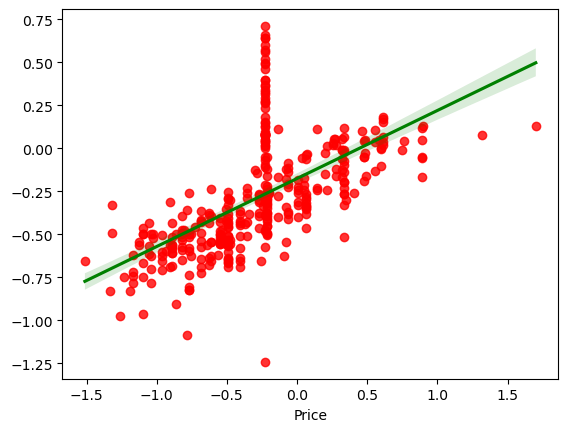

In [118]:
sns.regplot(data=df2,x=y_test,y=y_pred,scatter_kws={'color':'red'},line_kws={'color':'green'})

### Original Model

In [120]:
df3=df.copy()

In [121]:
model=smf.ols('Price~Age_08_04+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=df3).fit()

In [122]:
model.params

Intercept       -0.000405
Age_08_04       -0.624180
KM              -0.214446
HP               0.130459
CC              -0.013872
Doors           -0.000242
Gears            0.031066
Quarterly_Tax    0.043758
Weight           0.244637
dtype: float64

In [123]:
model.tvalues , np.round(model.pvalues,5)

(Intercept        -0.041447
 Age_08_04       -46.551876
 KM              -16.552424
 HP               11.209719
 CC               -1.316436
 Doors            -0.023012
 Gears             3.034563
 Quarterly_Tax     2.944198
 Weight           15.760663
 dtype: float64,
 Intercept        0.96695
 Age_08_04        0.00000
 KM               0.00000
 HP               0.00000
 CC               0.18824
 Doors            0.98164
 Gears            0.00245
 Quarterly_Tax    0.00329
 Weight           0.00000
 dtype: float64)

In [124]:
model.rsquared , model.rsquared_adj 

(0.8625200256947, 0.8617487495415146)

In [125]:
#### SLP and MLR models for insignificant variables

In [127]:
slr_cc=smf.ols('Price~CC',data=df).fit()
slr_cc.tvalues,slr_cc.pvalues

(Intercept   -0.101494
 CC           4.745039
 dtype: float64,
 Intercept    0.919173
 CC           0.000002
 dtype: float64)

In [129]:
slr_doors=smf.ols('Price~Doors',data=df).fit()
slr_doors.tvalues,slr_doors.pvalues

(Intercept   -0.100775
 Doors        7.070520
 dtype: float64,
 Intercept    9.197428e-01
 Doors        2.404166e-12
 dtype: float64)

In [131]:
mlr_ccdoors=smf.ols('Price~Doors+CC',data=df).fit()
mlr_ccdoors.tvalues,mlr_ccdoors.pvalues

(Intercept   -0.098643
 Doors        6.752236
 CC           4.268006
 dtype: float64,
 Intercept    9.214355e-01
 Doors        2.109558e-11
 CC           2.101878e-05
 dtype: float64)

### VIF

In [132]:
rsq_age=smf.ols('Age_08_04~KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_age=1/(1-rsq_age)
rsq_km=smf.ols('KM~Age_08_04+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_km=1/(1-rsq_km)
rsq_hp=smf.ols('HP~Age_08_04+KM+CC+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_hp=1/(1-rsq_hp)
rsq_cc=smf.ols('CC~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_cc=1/(1-rsq_cc)
rsq_doors=smf.ols('Doors~Age_08_04+KM+HP+CC+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_doors=1/(1-rsq_doors)
rsq_gears=smf.ols('Gears~Age_08_04+KM+HP+CC+Doors+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_gears=1/(1-rsq_gears)
rsq_qt=smf.ols('Quarterly_Tax~Age_08_04+KM+HP+CC+Doors+Gears+Weight',data=df).fit().rsquared
vif_qt=1/(1-rsq_qt)
rsq_wt=smf.ols('Weight~Age_08_04+KM+HP+CC+Doors+Gears+Quarterly_Tax',data=df).fit().rsquared
vif_wt=1/(1-rsq_wt)

d={'Variables':['Age_08_04','KM','HP','CC','Doors','Gears','Quarterly_Tax','Weight'],
    'Vif':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_wt]}
Vif_df=pd.DataFrame(d)
Vif_df


,Variables,Vif
0,Age_08_04,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


In [133]:
### No Collinearity observed

### Residual Analysis

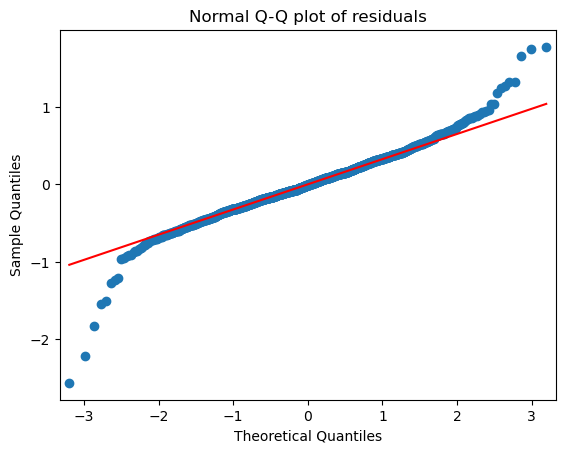

In [135]:
sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [139]:
def standard_values(vals) : 
    return (vals-vals.mean())/vals.std()

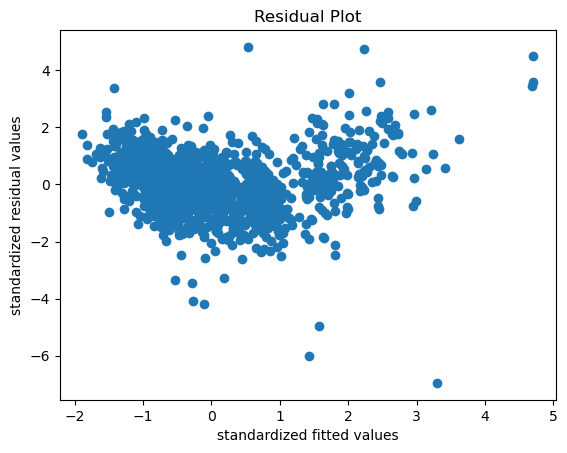

In [140]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

### Residuals vs Regressors

<Figure size 1500x1500 with 0 Axes>

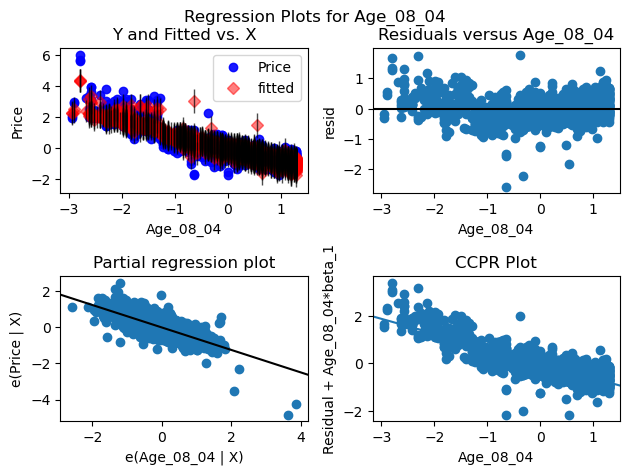

In [143]:
plt.figure(figsize=(15,15))
sm.graphics.plot_regress_exog(model,'Age_08_04')
plt.show()

<Figure size 1500x1500 with 0 Axes>

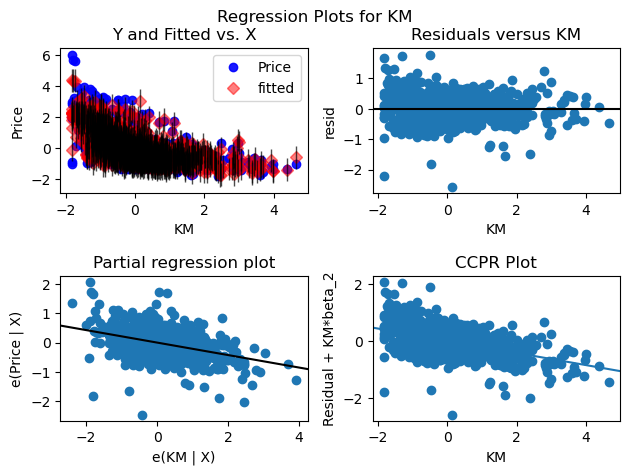

In [144]:
plt.figure(figsize=(15,15))
sm.graphics.plot_regress_exog(model,'KM')
plt.show()

<Figure size 1500x1500 with 0 Axes>

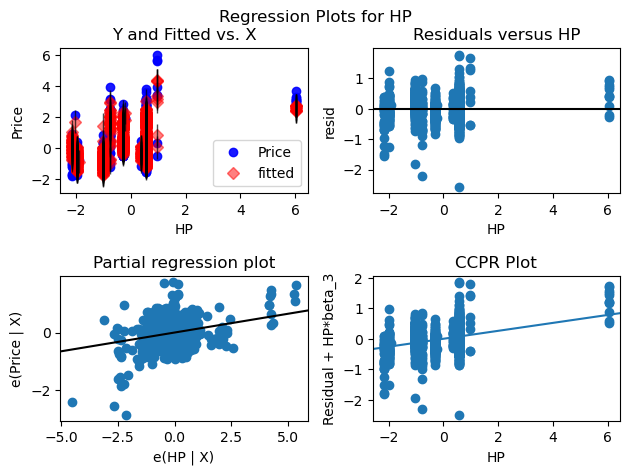

In [145]:
plt.figure(figsize=(15,15))
sm.graphics.plot_regress_exog(model,'HP')
plt.show()

<Figure size 1500x1500 with 0 Axes>

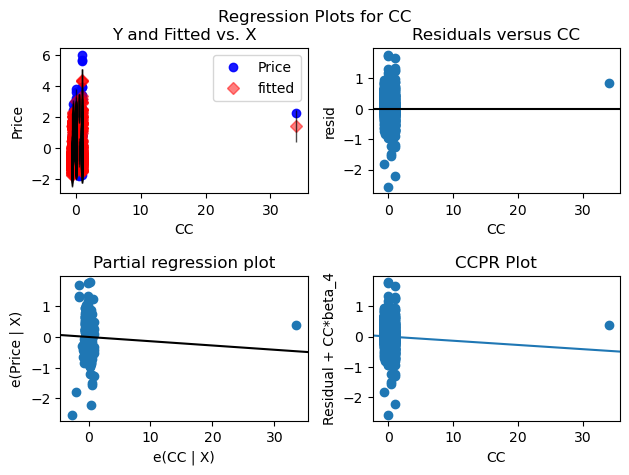

In [146]:
plt.figure(figsize=(15,15))
sm.graphics.plot_regress_exog(model,'CC')
plt.show()

<Figure size 1500x1500 with 0 Axes>

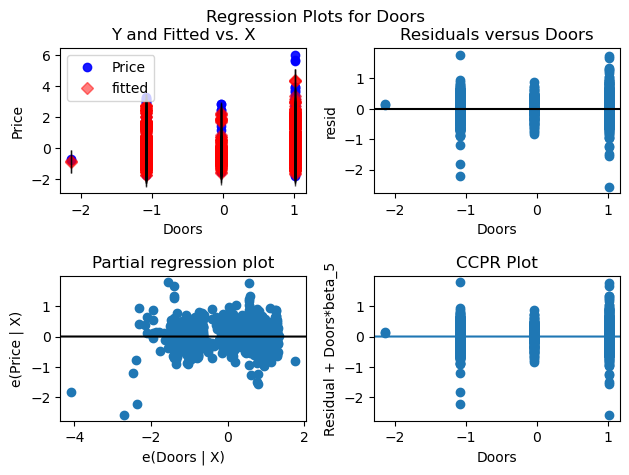

In [147]:
plt.figure(figsize=(15,15))
sm.graphics.plot_regress_exog(model,'Doors')
plt.show()

<Figure size 1500x1500 with 0 Axes>

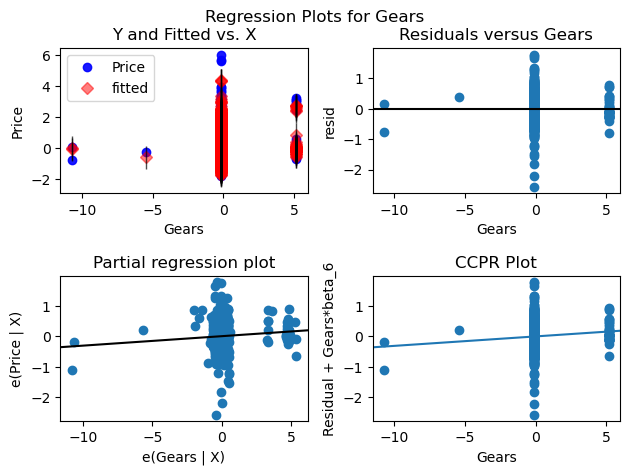

In [148]:
plt.figure(figsize=(15,15))
sm.graphics.plot_regress_exog(model,'Gears')
plt.show()

<Figure size 1500x1500 with 0 Axes>

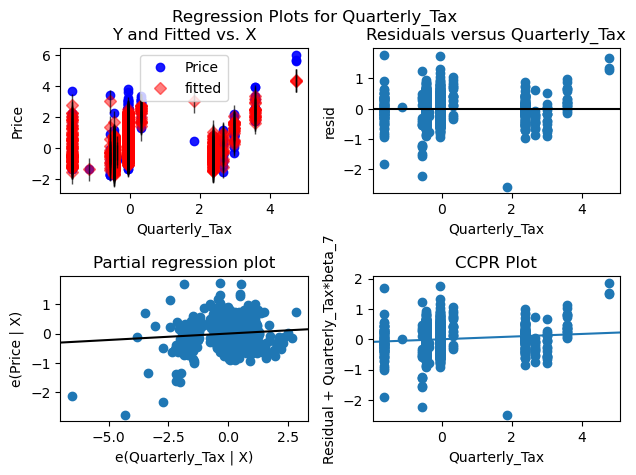

In [151]:
plt.figure(figsize=(15,15))
sm.graphics.plot_regress_exog(model,'Quarterly_Tax')
plt.show()

<Figure size 1500x1500 with 0 Axes>

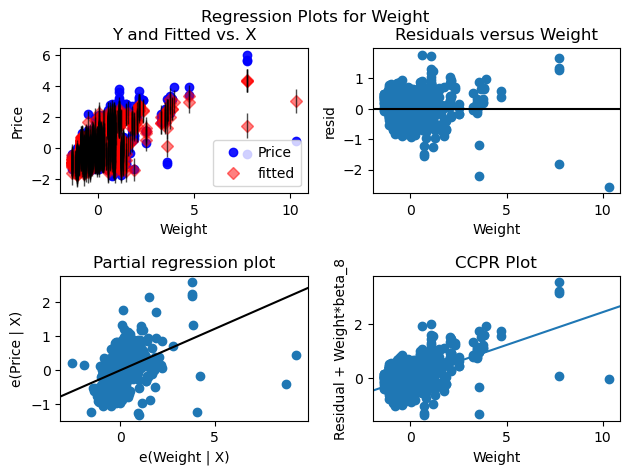

In [152]:
plt.figure(figsize=(15,15))
sm.graphics.plot_regress_exog(model,'Weight')
plt.show()

### Cook's Distance

In [153]:
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

### Stem Plot

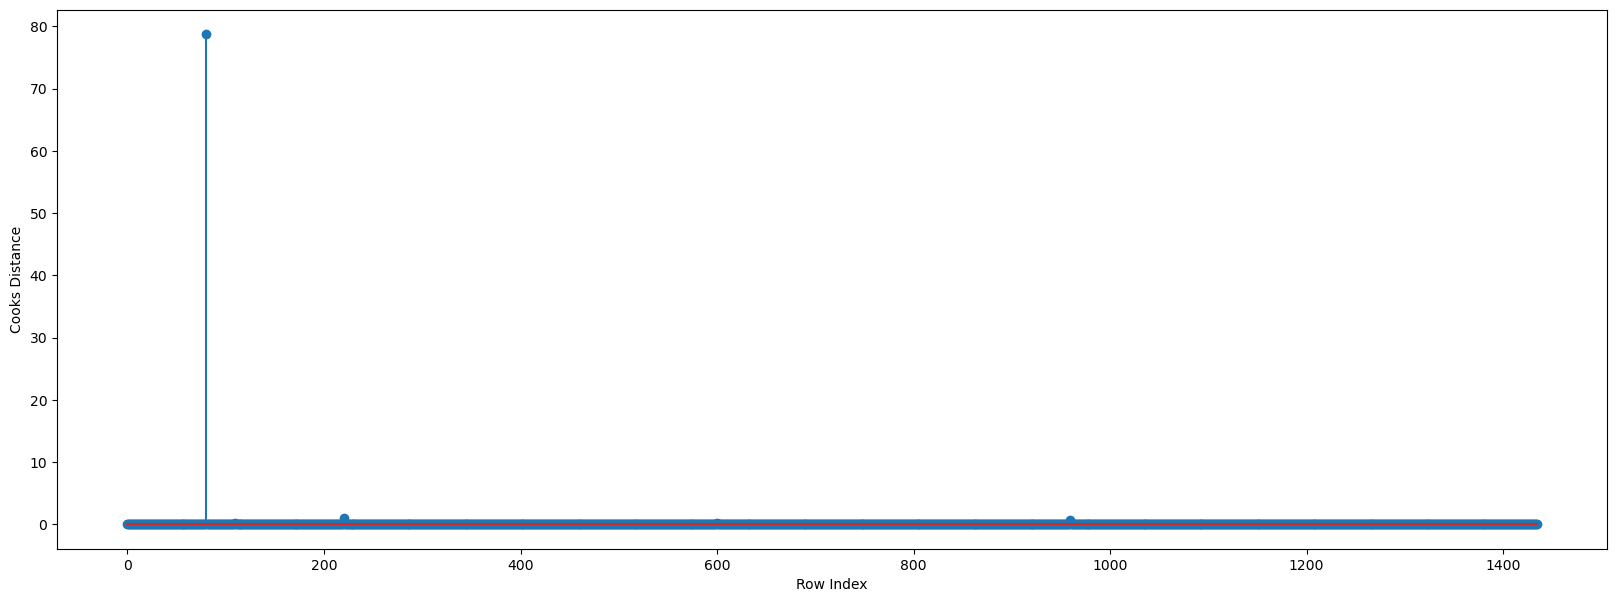

In [154]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [155]:
np.argmax(c) , np.max(c)

(80, 78.72950582258676)

### High Influencer Plot

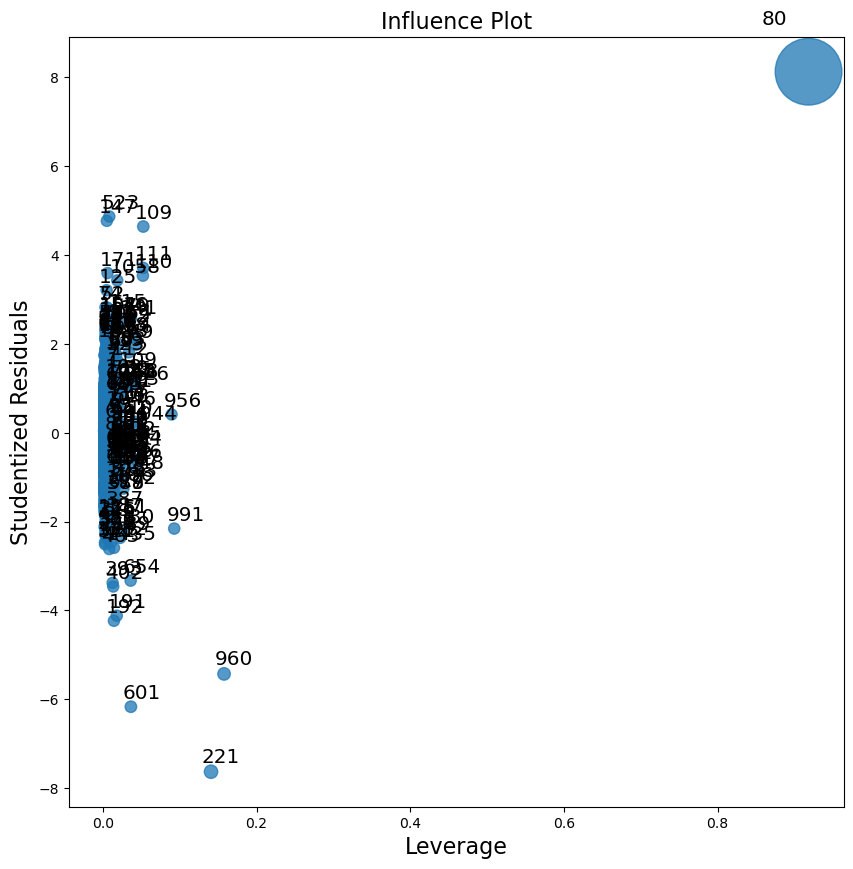

In [158]:
fig,ax=plt.subplots(figsize=(10,10))
fig=influence_plot(model,ax = ax)

In [159]:
### Leverage Cuttoff Value = 3*(k+1)/n
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [160]:
df[df.index.isin([80])] 

,Price,Age_08_04,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
80,2.26692,-1.664402,-1.293942,0.56744,33.997687,1.014941,-0.140425,0.313211,2.043609


In [161]:
df_new=df.copy()
df_new

,Price,Age_08_04,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,0.763763,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.853577
...,...,...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-0.901883
1432,0.031491,0.863362,-1.321120,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915


In [162]:
df_new=df_new.drop(df_new.index[[80]],axis=0).reset_index(drop=True)
df_new

,Price,Age_08_04,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,0.763763,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.853577
...,...,...,...,...,...,...,...,...,...
1429,-0.891089,0.702015,-1.279939,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-0.901883
1430,0.031491,0.863362,-1.321120,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1431,-0.615281,0.809579,-1.374036,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1432,-0.960042,0.755797,-1.376703,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915


In [163]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age_08_04+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=df_new).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df_new=df_new.drop(df_new.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df_new
    else:
        final_model=smf.ols('Price~Age_08_04+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=df_new).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565242
Thus model accuracy is impro

In [164]:
print('Final Model Accuracy:',final_model.rsquared)

Final Model Accuracy: 0.9003762532318559


In [187]:
y_pred=model.predict(df_new)
y_pred

0       1.268490
1       1.284830
2       1.256835
3       1.101633
4       1.873780
          ...   
1325   -0.862142
1326   -0.421373
1327   -0.606428
1328   -0.568163
1329   -0.537897
Length: 1330, dtype: float64

#### Final model accuracy is 90% nd it is the best model